# Benford's Law Basics and Testing Procedures

 ###  Part A. Testing of First order law on Expenditure Data of non employing businesses provided by US Census:
 
 **Summary**
* The below dataset includes number of businesses (with no paid employees) and total receipts for the year 2014 in the US. This dataset is a publicly available set from the US Census and ideally mimics a dataset that contains naturally observable/real world datapoints.  We will be assessing  conformity of this dataset to the Benford's Law( Of natural datasets) by doing first order testing.
     
  #### Please refer the below link for dataset and the data descriptions
     https://www.census.gov/data/datasets/2014/econ/nonemployer-statistics/historical-datasets.html
     
Columns relevant to this notebook/analysis:
* st:- state code
* city:- city code
* rcptot:- receipt amount in factor of 1000 USD

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [3]:
receipts=pd.read_csv("Nonemp14co.csv")
receipts.describe()
receipts.head(5)

,st,cty,naics,estab_f,estab,rcptot_n_f,rcptot_f,rcptot
0,1,1,00,NaN,3072,G,NaN,109407
1,1,1,11,NaN,32,G,NaN,837
2,1,1,113,NaN,13,G,NaN,381
3,1,1,114,NaN,6,H,NaN,208
4,1,1,1141,D,0,D,D,0


In [4]:
#### Importing city name into original dataframe "receipts"
st_cty_desc=pd.read_csv("state_county_descriptions.csv")
st_cty_desc.describe()

,st,cty
count,3142.000000,3142.000000
mean,30.291534,103.774348
std,15.146393,107.976036
min,1.000000,1.000000
25%,18.000000,35.000000
50%,29.000000,79.000000
75%,45.000000,133.000000
max,56.000000,840.000000


In [5]:
receipts_merged=pd.merge(receipts,
                        st_cty_desc,
                        on =['st','cty'],
                        how='left') 

In [6]:
receipts_merged.head(5)
df=receipts_merged[["ctyname","estab","rcptot","rcptot_n_f","estab_f"]]

df.drop(df[(df["rcptot_n_f"]=='D')].index,inplace=True)
df.drop(df[(df["rcptot_n_f"]=='S')].index,inplace=True)

# # dropping zero receipts where receipt flags are "D" or "S" as these records do not contain receipt amounts
df.drop(df[(df["rcptot_n_f"]=='D')].index,inplace=True)
df.drop(df[(df["rcptot_n_f"]=='S')].index,inplace=True)

## for simplicity and easier processing all amounts below 10k dollars are also removed from analysis as they have first 2 digits starting as 01,02... which needs to be further processed to get the next 2 digits. 
## This is essentially 1262 out of 5522346 datapoints and approx(0.02% of the dataset)
df.drop(df[(df["rcptot"]<10)].index,inplace=True)



C:\Users\abhij\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\abhij\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
df["first_two_digits"]=df["rcptot"].astype(str).str[:2].astype(int)


<ipython-input-7-c0ee675d76ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["first_two_digits"]=df["rcptot"].astype(str).str[:2].astype(int)


In [8]:
df

,ctyname,estab,rcptot,rcptot_n_f,estab_f,first_two_digits
0,"Autauga County, AL",3072,109407,G,NaN,10
1,"Autauga County, AL",32,837,G,NaN,83
2,"Autauga County, AL",13,381,G,NaN,38
3,"Autauga County, AL",6,208,H,NaN,20
6,"Autauga County, AL",4,203,H,NaN,20
...,...,...,...,...,...,...
979825,"Weston County, WY",4,38,H,NaN,38
979826,"Weston County, WY",10,91,H,NaN,91
979829,"Weston County, WY",35,563,G,NaN,56
979832,"Weston County, WY",32,496,G,NaN,49


In [9]:
df.describe()

,estab,rcptot,first_two_digits
count,551084.000000,5.510840e+05,551084.000000
mean,198.734129,9.118727e+03,38.600237
std,2541.891206,1.310146e+05,24.882707
min,3.000000,1.000000e+01,10.000000
25%,9.000000,2.620000e+02,17.000000
50%,22.000000,8.160000e+02,31.000000
75%,70.000000,2.834000e+03,56.000000
max,991091.000000,5.178875e+07,99.000000


<AxesSubplot:title={'center':'Histogram of First 2 digits of Receipt Amount'}, xlabel='First Two Digits of Receipt Amount', ylabel='Count of Occurences/Frequency of Record'>

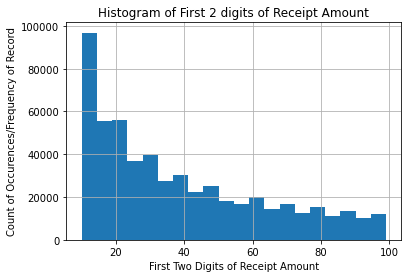

In [10]:
plt=df['first_two_digits'].plot(kind='hist', 
                                label ='Frequency of first 2 digits',title='Histogram of First 2 digits of Receipt Amount',
                                grid='line',
                                bins=20#bin size of 5. Each value interval in x is of 5
                                
                               )
plt.set_xlabel("First Two Digits of Receipt Amount")
plt.set_ylabel("Count of Occurences/Frequency of Record")
plt

#### Conclusion of First 2 digit test:- 

#### As seen above it is evident that the above dataset approximately conforms to the 2 digit test(first order testing) of Benford's Law considering the trend line observed.

There is a small non conformity for case '10', we see that '15' has a higher frequency than '10'. That needs to be further analyzed for any natural biases while collecting data. It is possible that there is a minimum qualification limit for a receipt amount to be recorded is that it starts with '15' as its first 2 digits. However until then, we can  say that it only approximately conforms to Benford's law and the cause of the bias needs to be understood further.

For visualizations,proportions and explanation of Benford's law please click here https://en.wikipedia.org/wiki/Benford%27s_law

#### Z-Statistic Testing
To measure the significance of difference/conformity of the 2 digit test in Benford's law, it is imperative to take up the z-statistic test. The basic variables against which impact and help us understand the significance are:-
* magnitude of difference between actual proportion of the 2 digits and the expected proportion of the 2 digits(|AP-EP|)
* size of the dataset(N)
* magnitude of the expected proportion(EP)

                              (|AP-EP|-(1/2N))
                    Z =     ___________________
                            
                            ((EP(1-EP)/2N)^0.5)

In [11]:
f_digits=pd.DataFrame() 
# Define data size
n=551084

f_digits['actual_proportion']=df["first_two_digits"].value_counts()/n

b_digits=pd.read_excel("Expected_Proportions_Benford_Set.xlsx")
b_digits.set_index("first_two_digits",drop=True,inplace=True)
        
prop_df=pd.DataFrame()
prop_df= b_digits[['EP']].copy()
prop_df['AP']= f_digits[['actual_proportion']].copy()


Define significance level(alpha) of abnormality to assess non conformity to Benford's Law. Significance level(alpha) essentially means that for each value in the dataset, there is a 1% risk in concluding that difference between Actual and Expected Proportions exists.

 At 5 percent significance level cutoff Z- score is 1.96.  Applying it to our dataset:- 

In [12]:
significance_level=1.96
prop_df['Z']=(abs(prop_df['AP']-prop_df['EP'])-(0.5*(1/n)))/(pow(((prop_df['EP']*(1-prop_df['EP']))/n),0.5))
prop_df['Significance']=prop_df.apply(lambda prop_df: 1 if prop_df['Z']>significance_level else 0,axis=1)
prop_df['Significance'].describe()

count    90.000000
mean      0.822222
std       0.384467
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Significance, dtype: float64

#### Conclusion of Z-Statistic Test:- 
The first 2 digits differ significantly as we move down the list. High values of Z need to be analyzed for potential inaccuracies/ inherent biases in dataset.

For large datasets even small differences in proportions are flagged as significant difference. This is known as the inherent power problem. As you can see in the above dataset, close to 82% of the values differ "significantly" as per the test.

In [13]:
# Identifying top 10 z-Values for further analysis
top_10_z=prop_df['Z'].sort_values(ascending=False)
top_10_z[0:11]

first_two_digits
78    17.610501
56    16.867354
81    15.689737
95    14.966202
60    14.285783
92    14.268480
86    13.022010
84    12.765908
24    12.143841
66    11.676275
51    11.201019
Name: Z, dtype: float64

##### Key Insight 

Receipts starting with the above top 10 2 digits can be looked at to find inaccuracies/inherent biases in dataset

#### Kolmogorov Smirnoff Test

In [14]:
# prop_df["first_two_digit"]=prop_df.index
# prop_df.drop("first_two_digit",axis=1,inplace=True)
# prop_df.reset_index(inplace=True)
# prop_df

,first_two_digits,EP,AP,Z,Significance
0,10,0.042,0.041010,3.660181,1
1,11,0.038,0.037796,0.786926,0
2,12,0.034,0.034957,3.914535,1
3,13,0.034,0.032117,7.710648,1
4,14,0.030,0.029838,0.702963,0
...,...,...,...,...,...
85,95,0.006,0.004442,14.966202,1
86,96,0.004,0.004482,5.659082,1
87,97,0.004,0.004448,5.253588,1
88,98,0.004,0.004266,3.119406,1


In [17]:
prop_df

,first_two_digits,EP,AP,Z,Significance
0,10,0.042,0.041010,3.660181,1
1,11,0.038,0.037796,0.786926,0
2,12,0.034,0.034957,3.914535,1
3,13,0.034,0.032117,7.710648,1
4,14,0.030,0.029838,0.702963,0
...,...,...,...,...,...
85,95,0.006,0.004442,14.966202,1
86,96,0.004,0.004482,5.659082,1
87,97,0.004,0.004448,5.253588,1
88,98,0.004,0.004266,3.119406,1


#### Tests based on logarithmic  of receipt amounts

In [11]:
df["log_receipt"]=np.log10(df["rcptot"])
df

<ipython-input-11-3b5cae9dfdea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_receipt"]=np.log10(df["rcptot"])


,ctyname,estab,rcptot,rcptot_n_f,estab_f,first_two_digits,log_receipt
0,"Autauga County, AL",3072,109407,G,NaN,10,5.039045
1,"Autauga County, AL",32,837,G,NaN,83,2.922725
2,"Autauga County, AL",13,381,G,NaN,38,2.580925
3,"Autauga County, AL",6,208,H,NaN,20,2.318063
6,"Autauga County, AL",4,203,H,NaN,20,2.307496
...,...,...,...,...,...,...,...
979825,"Weston County, WY",4,38,H,NaN,38,1.579784
979826,"Weston County, WY",10,91,H,NaN,91,1.959041
979829,"Weston County, WY",35,563,G,NaN,56,2.750508
979832,"Weston County, WY",32,496,G,NaN,49,2.695482


In [12]:
df_new=df.sort_values(by='rcptot').reset_index(drop=True)
df_new

,ctyname,estab,rcptot,rcptot_n_f,estab_f,first_two_digits,log_receipt
0,"Leavenworth County, KS",3,3,G,NaN,3,0.477121
1,"Bath County, KY",3,3,G,NaN,3,0.477121
2,"Runnels County, TX",3,3,G,NaN,3,0.477121
3,"Falls County, TX",3,3,G,NaN,3,0.477121
4,"Jackson County, MI",3,3,G,NaN,3,0.477121
...,...,...,...,...,...,...,...
552341,"New York County, NY",225724,17803976,G,NaN,17,7.250517
552342,"Miami-Dade County, FL",435368,18064540,G,NaN,18,7.256827
552343,"Harris County, TX",387455,20157499,G,NaN,20,7.304437
552344,"Cook County, IL",464097,20265257,G,NaN,20,7.306752


<AxesSubplot:xlabel='Rank', ylabel='Log of Receipt Amount'>

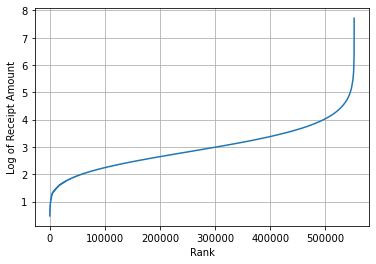

In [13]:
df_new.index.rename('ranking', inplace=True)
df_new
plt_new=df_new["log_receipt"].plot(kind='line',grid='line')
plt_new.set_xlabel("Rank")
plt_new.set_ylabel("Log of Receipt Amount")
plt_new

Above plot indicates that there is a approximate conformity to Benford's law based on the below conditions:-
* If the data followed Benford’s Law closely we would see either a single straight line, or a series of straight lines with varying slopes from integer value to integer value
* That is, from 1.00 to 2.00, from 2.00 to 3.00, from 3.00 to 4.00, and so on up the y-axis. The graph need not be straight (linear) from the first record to the Nth record, it need only be linear between the integer values on the y-axis. In the above plot there is a approximate linearity starting from 1 to 4

#### Lets look at the mantissa of the log values. According to benford's Law there should be a linear conformity of mantissas with the order of values.

<AxesSubplot:>

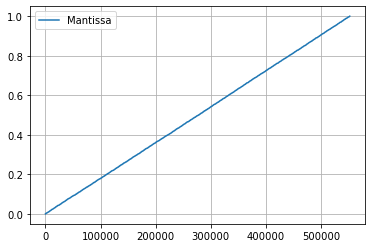

In [20]:
mantissa=[]
log_rank=[]
for i in range (0,len(df_new)):
    mn=math.log(df_new.loc[i,"rcptot"])-math.floor(math.log(df_new.loc[i,"rcptot"]))
    mantissa.append(mn)    
mantissa_df=pd.DataFrame(mantissa,columns=['Mantissa'])
mantissa_df_sorted=mantissa_df.sort_values(by='Mantissa').reset_index(drop=True)
# for i in range(0,len(mantissa_df_sorted)):
#     lr=math.log10(i+1)
#     log_rank.append(lr)
# mantissa_df_sorted["Log_rank"]=log_rank
plt_mantissa=mantissa_df_sorted.plot(kind='line',grid='line')
plt_mantissa

#### Mantissas follow a perfect straight line from 0 to 1 which shows extremely good conformity to Benford's Law.